# SynapSee EDA

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt
import seaborn as sns
import json


In [2]:
# load json object
with open('SynapSee_data.json') as json_file:
    data = json.load(json_file)

print(data.keys())

dict_keys(['subjects'])


In [3]:
#data['subjects'][0]

In [4]:
EEG_COLUMNS = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']

# empty dataframe
eeg_df = pd.DataFrame()

for subject_id in range(len(data['subjects'])):
  # concat image to dataframe
    for image in data['subjects'][subject_id]['view_images']:
        # concat image to dataframe
        eeg_df = pd.concat([eeg_df, pd.DataFrame(image['EEG_signal'], columns=EEG_COLUMNS)], ignore_index=True)
        
eeg_df.head(5)


C:\Users\mateo\AppData\Local\Temp\ipykernel_17416\637737376.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eeg_df = pd.concat([eeg_df, pd.DataFrame(image['EEG_signal'], columns=EEG_COLUMNS)], ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_17416\637737376.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eeg_df = pd.concat([eeg_df, pd.DataFrame(image['EEG_signal'], columns=EEG_COLUMNS)], ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_17416\637737376.py:10:

Fp1          Fp2            C3            C4           P7  \
0  60780.472848  9003.215611 -19887.777554 -37804.444171 -3072.202572   
1  60772.381517  9008.825899 -19882.971928 -37798.096275 -3066.614636   
2  60769.475790  9000.153422 -19889.029251 -37810.300328 -3075.935313   
3  60757.227034  8996.957123 -19892.247902 -37810.523845 -3075.756499   
4  60754.723639  8995.213687 -19895.265388 -37814.949490 -3078.416357   

             P8           O1            O2            F7            F8  \
0 -31336.698691 -5503.088892 -31309.384860 -41915.175845 -32607.283605   
1 -31345.706444 -5495.310485 -31306.747354 -41910.549034 -32598.521721   
2 -31351.964933 -5510.442616 -31317.185619 -41924.228302 -32608.401192   
3 -31344.633561 -5510.129691 -31306.590892 -41953.017348 -32617.788925   
4 -31344.544154 -5509.146215 -31319.554903 -41965.690788 -32619.577064   

             F3            F4            T7            T8           P3  \
0 -43316.607871 -37451.398367 -20028.414730 -38451.080138 -3099.114072   
1 -43303.800321 -37441.541248 -20032.549802 -38440.127783 -3101.840985   
2 -43305.141426 -37443.798774 -20011.717977 -38432.729355 -3090.016912   
3 -43320.318260 -37456.002826 -20046.206718 -38448.844963 -3107.317162   
4 -43330.309490 -37458.394463 -20037.355427 -38431.142382 -3101.036322   

             P4  
0 -34363.013132  
1 -34357.313437  
2 -34359.369798  
3 -34368.399902  
4 -34368.019923

In [28]:
eeg_df.shape

(671499, 16)

In [5]:
#data['subjects'][0]['view_images']

In [6]:
# dataframe subject 0
eeg_df_sub0 = pd.DataFrame()

for image in data['subjects'][0]['view_images']:
    # concat image to dataframe
    eeg_df_sub0 = pd.concat([eeg_df_sub0, pd.DataFrame(image['EEG_signal'], columns=EEG_COLUMNS)], ignore_index=True)

eeg_df_sub0.head(5)

C:\Users\mateo\AppData\Local\Temp\ipykernel_17416\1479524459.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eeg_df_sub0 = pd.concat([eeg_df_sub0, pd.DataFrame(image['EEG_signal'], columns=EEG_COLUMNS)], ignore_index=True)


Fp1          Fp2            C3            C4           P7  \
0  60780.472848  9003.215611 -19887.777554 -37804.444171 -3072.202572   
1  60772.381517  9008.825899 -19882.971928 -37798.096275 -3066.614636   
2  60769.475790  9000.153422 -19889.029251 -37810.300328 -3075.935313   
3  60757.227034  8996.957123 -19892.247902 -37810.523845 -3075.756499   
4  60754.723639  8995.213687 -19895.265388 -37814.949490 -3078.416357   

             P8           O1            O2            F7            F8  \
0 -31336.698691 -5503.088892 -31309.384860 -41915.175845 -32607.283605   
1 -31345.706444 -5495.310485 -31306.747354 -41910.549034 -32598.521721   
2 -31351.964933 -5510.442616 -31317.185619 -41924.228302 -32608.401192   
3 -31344.633561 -5510.129691 -31306.590892 -41953.017348 -32617.788925   
4 -31344.544154 -5509.146215 -31319.554903 -41965.690788 -32619.577064   

             F3            F4            T7            T8           P3  \
0 -43316.607871 -37451.398367 -20028.414730 -38451.080138 -3099.114072   
1 -43303.800321 -37441.541248 -20032.549802 -38440.127783 -3101.840985   
2 -43305.141426 -37443.798774 -20011.717977 -38432.729355 -3090.016912   
3 -43320.318260 -37456.002826 -20046.206718 -38448.844963 -3107.317162   
4 -43330.309490 -37458.394463 -20037.355427 -38431.142382 -3101.036322   

             P4  
0 -34363.013132  
1 -34357.313437  
2 -34359.369798  
3 -34368.399902  
4 -34368.019923

In [29]:
eeg_df.shape

(671499, 16)

In [7]:
# look for image data
def get_image_data(data, img_class, img_num, subject_num=0):
    """
    Returns the image data dictionary for the specified image class, number and subject.
    Parameters:
        data (dict): The data dictionary.
        img_class (str): The image class.
        img_num (int): The image number.
        subject_num (int): The subject number.
    Returns:
        dict: The image data dictionary.
        Error: If the image class is invalid.
    """
    # validate image class to save time
    if img_class not in ['cat', 'dog', 'rabbit', 'control']:
        raise ValueError('Invalid image class.')
    
    ext = 'jpg' if img_class != 'control' else 'jpeg'

    for image in data['subjects'][subject_num]['view_images']:
        if image['file_path'] == f"images/train/{img_class}/{img_num}.{ext}":
            return image

    return None

# get_image_data(data, 'rabbit', 150)

In [8]:
# Plotting functions
def plot_in_grid(plots, grid_shape):
    """
    Plots a list of matplotlib plots in a grid layout.

    Parameters:
    - plots: A list of matplotlib plots.
    - grid_shape: A tuple (rows, columns) specifying the grid layout.
    """

    # Ensure that the number of plots does not exceed the grid capacity
    if len(plots) > grid_shape[0] * grid_shape[1]:
        raise ValueError("Number of plots exceeds the grid capacity")

    # Create a new figure
    plt.figure(figsize=(12, 8))

    # Iterate over the plots and add them to the grid
    for i, plot in enumerate(plots):
        # Add a new subplot in the correct position
        ax = plt.subplot(grid_shape[0], grid_shape[1], i + 1)

        # Draw the plot in the subplot
        plot(ax)

    # Show the final layout
    plt.tight_layout()
    plt.show()

def plot_eeg_data_separate_plots(eeg_data):
    '''
    Plots all of the channels of the EEG data in separate plots
    Params:
        eeg_data: pandas DataFrame with the EEG data
    '''
    eeg_columns = eeg_data.columns
    fig, axs = plt.subplots(len(eeg_columns), 1, figsize=(10, 10))
    for i, column in enumerate(eeg_columns):
        axs[i].plot(eeg_data[column])
        axs[i].set_title(column)
        axs[i].set_xlabel('Time (ms)')
        axs[i].set_ylabel('Amplitude (uV)')
    plt.show()

def plot_eeg_data_same_plot(eeg_data, centered=False, plot=False):
    def plot_func(ax):
        eeg_columns = eeg_data.columns
        for column in eeg_columns:
            if centered:
                ax.plot(eeg_data[column] - np.mean(eeg_data[column]), label=column)
            else:
                ax.plot(eeg_data[column], label=column)

        title = 'Centered EEG data' if centered else 'EEG data'
        ax.set_title(title)
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Amplitude (uV)')
        ax.legend(loc='upper right')

    if plot:
        fig, ax = plt.subplots(figsize=(10, 10))
        plot_func(ax)
        plt.show()
    else:
        return plot_func



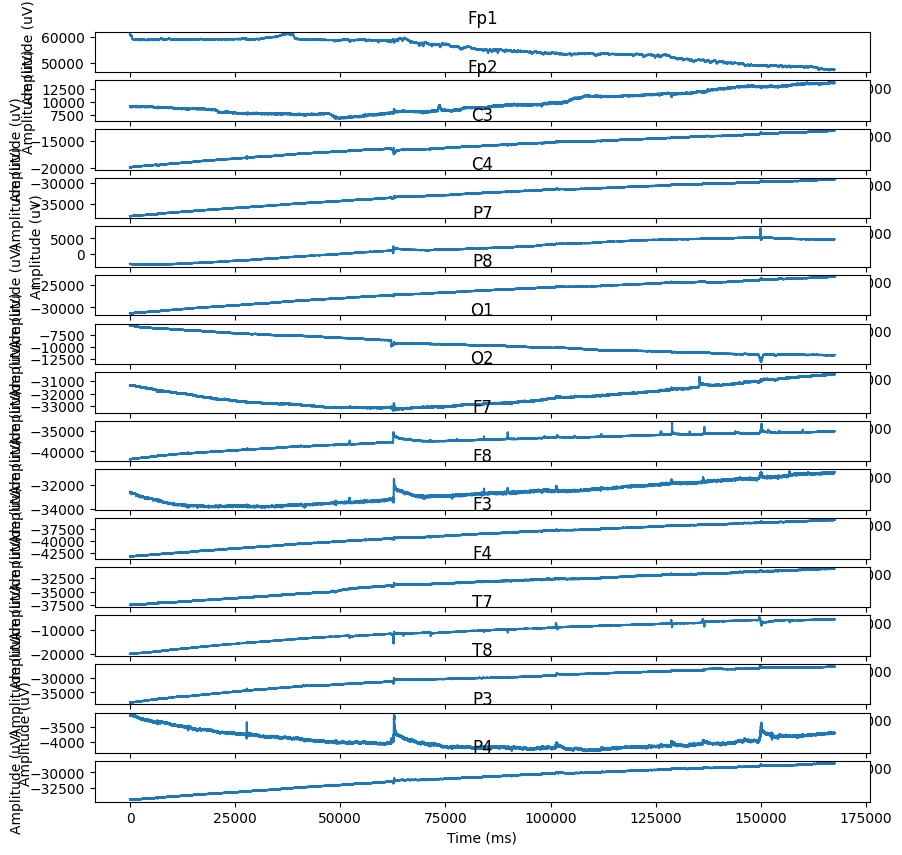

In [9]:
plot_eeg_data_separate_plots(eeg_df_sub0)

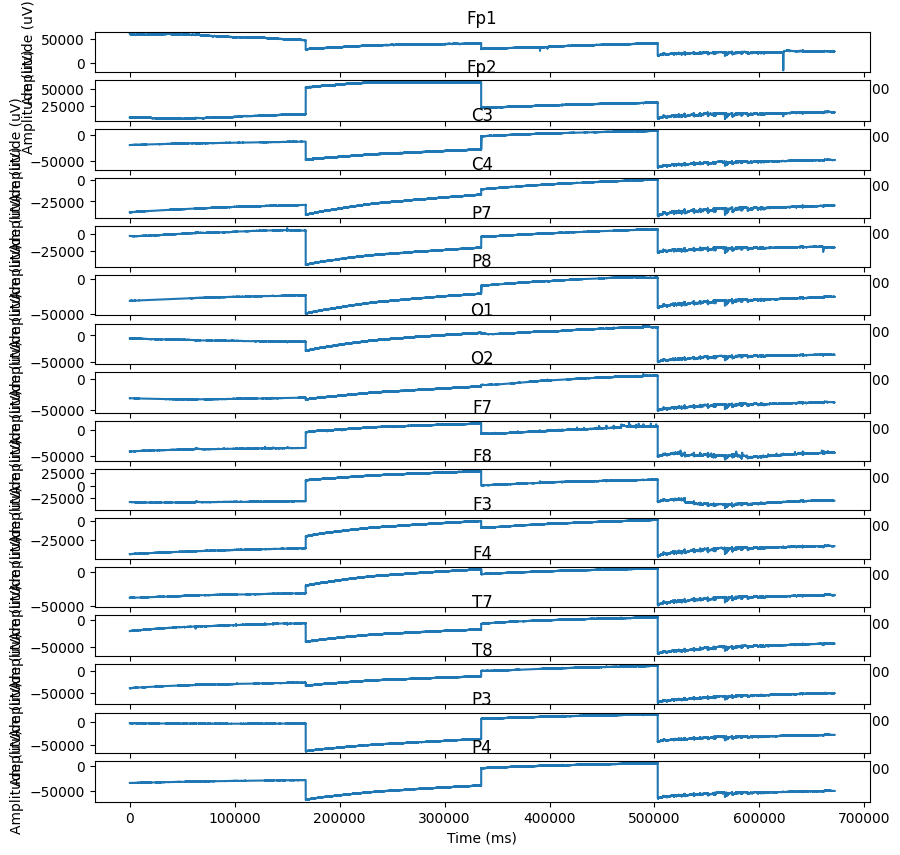

In [10]:
plot_eeg_data_separate_plots(eeg_df)

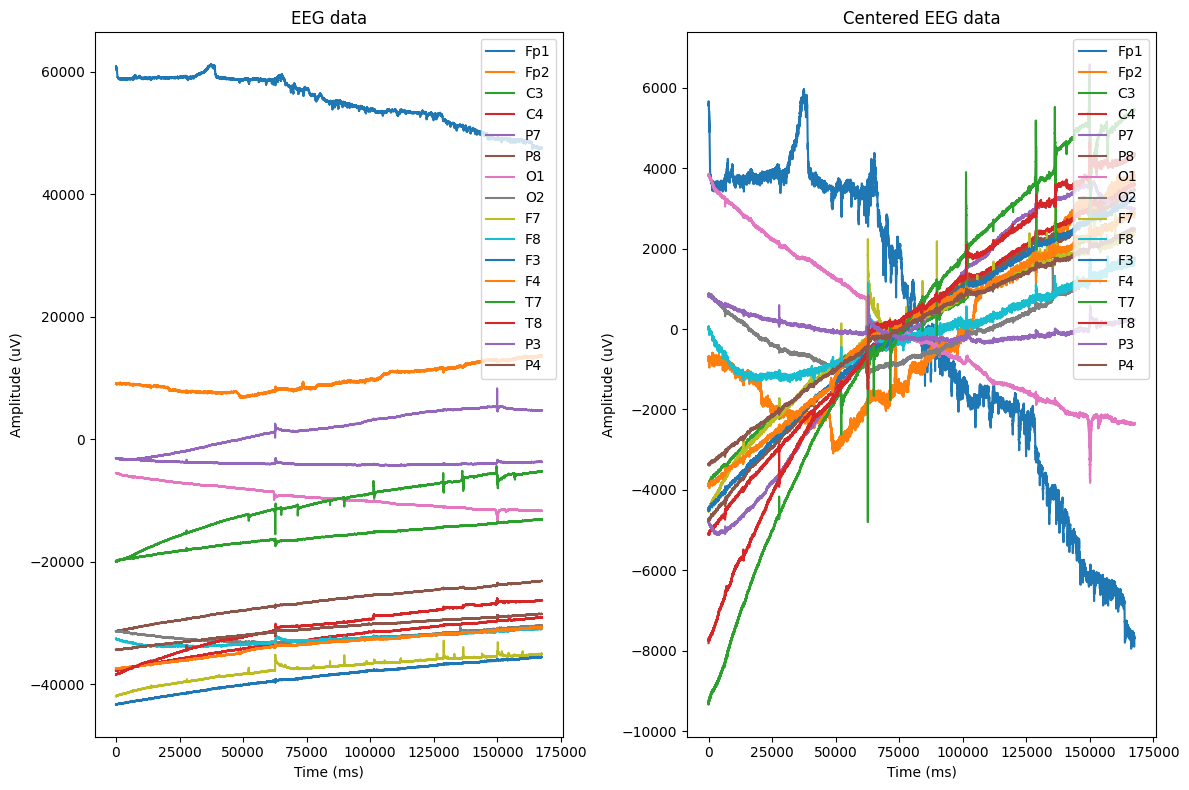

In [11]:
plot_in_grid([plot_eeg_data_same_plot(eeg_df_sub0),
            plot_eeg_data_same_plot(eeg_df_sub0, centered=True)], 
            (1, 2))

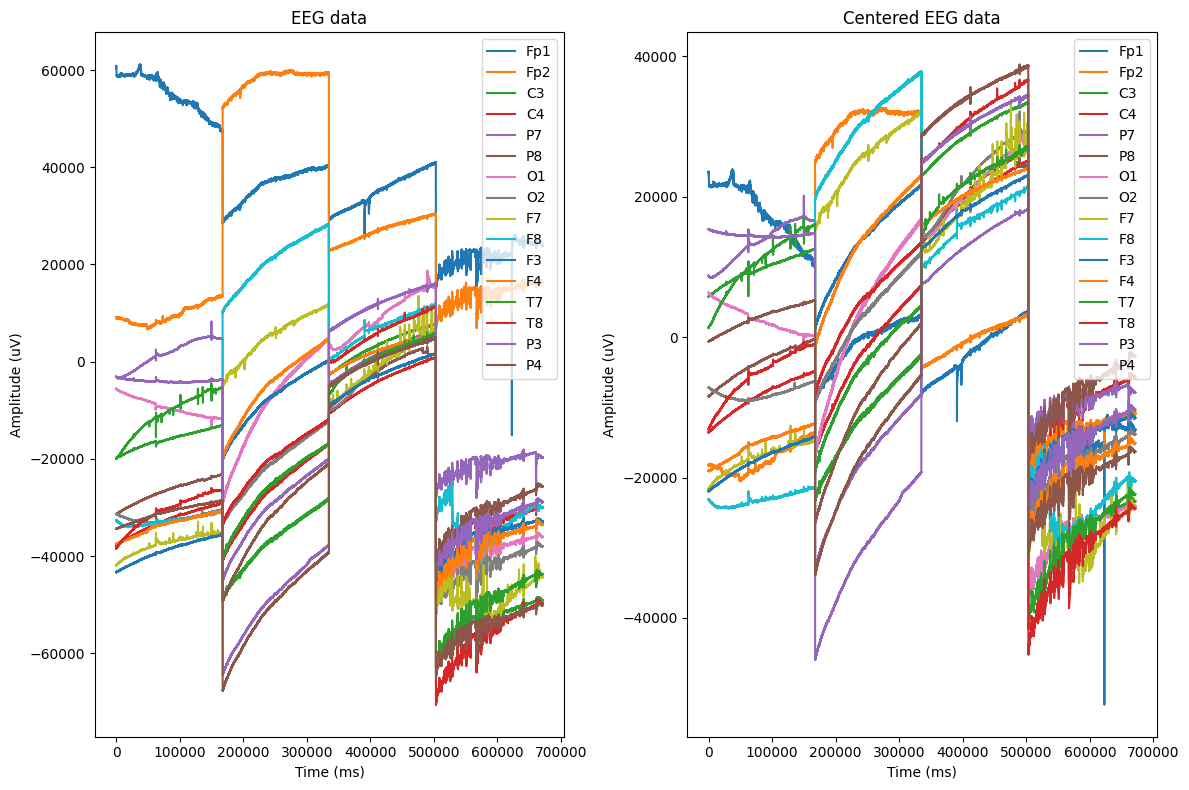

In [12]:
plot_in_grid([plot_eeg_data_same_plot(eeg_df),
            plot_eeg_data_same_plot(eeg_df, centered=True)], 
            (1, 2))

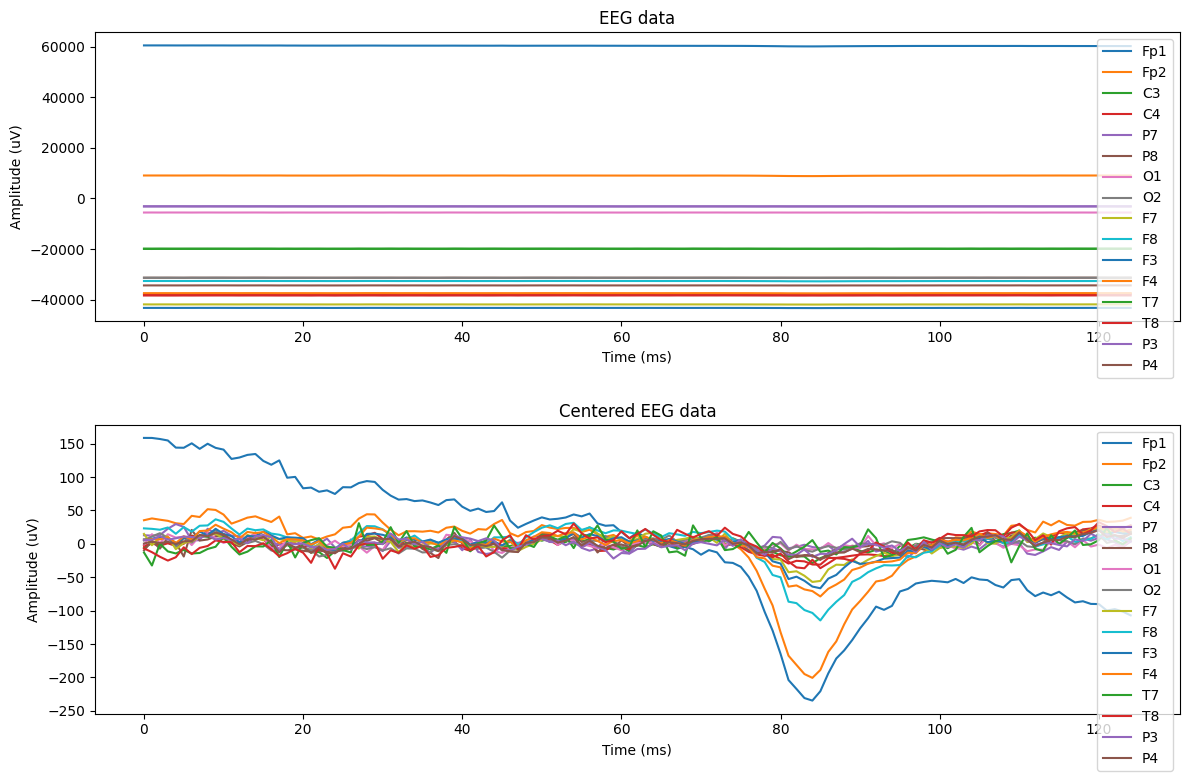

In [13]:
#cat = pd.read_csv('processed_data/eeg_data_cat_2.csv')
cat = pd.DataFrame(get_image_data(data, 'cat', 2)['EEG_signal'], columns=EEG_COLUMNS)
plot_in_grid([plot_eeg_data_same_plot(cat),
            plot_eeg_data_same_plot(cat, centered=True)], 
            (2, 1))

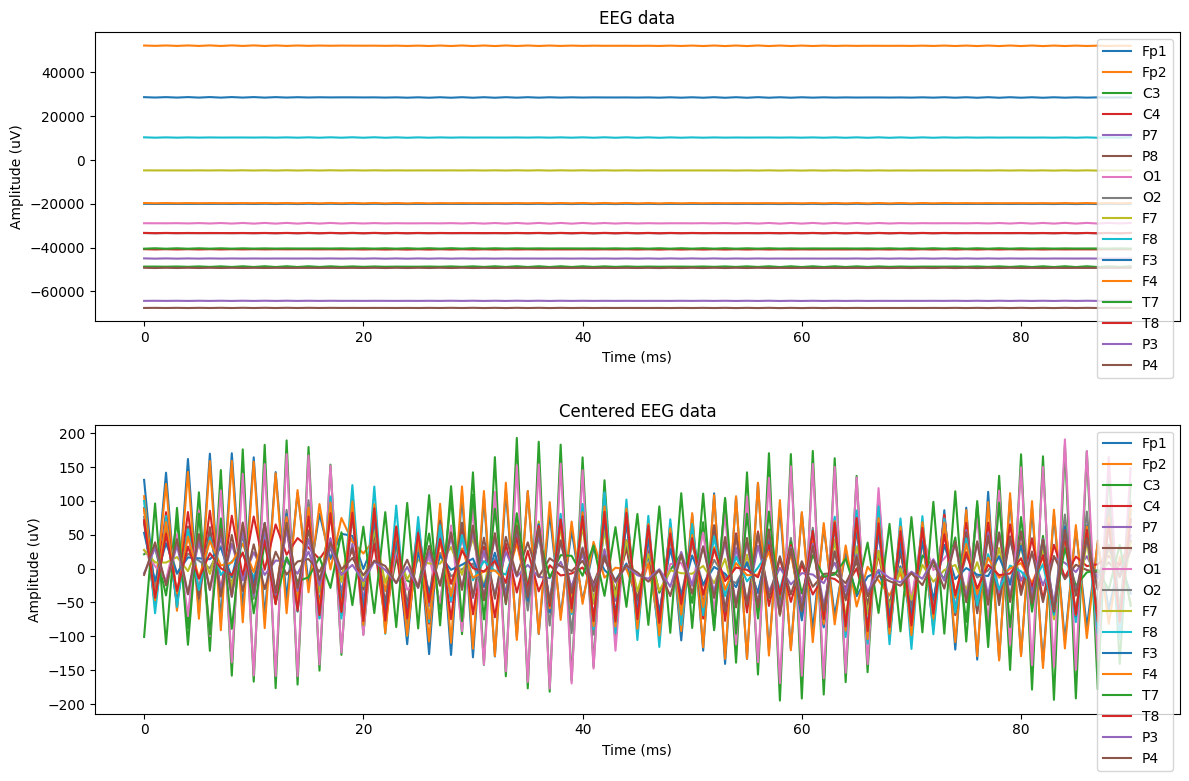

In [14]:
#cat = pd.read_csv('processed_data/eeg_data_cat_2.csv')
cat = pd.DataFrame(get_image_data(data, 'cat', 2, 1)['EEG_signal'], columns=EEG_COLUMNS)
plot_in_grid([plot_eeg_data_same_plot(cat),
            plot_eeg_data_same_plot(cat, centered=True)], 
            (2, 1))

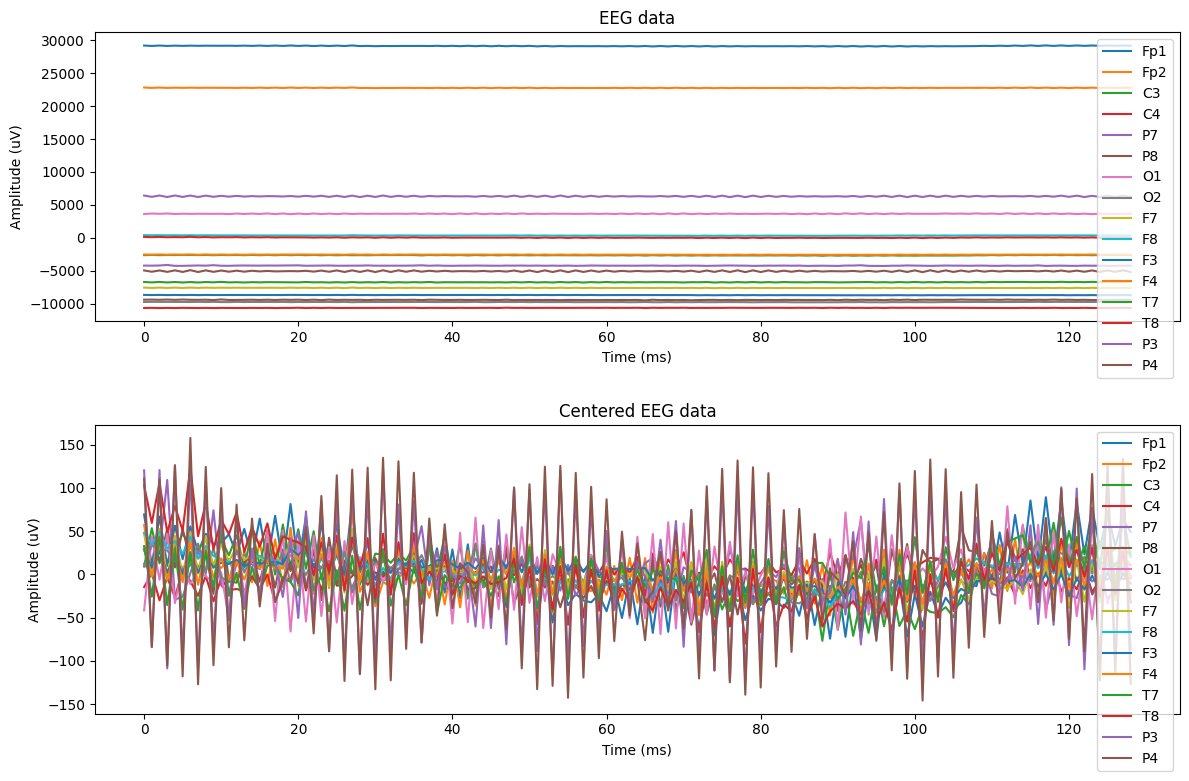

In [15]:
#cat = pd.read_csv('processed_data/eeg_data_cat_2.csv')
cat = pd.DataFrame(get_image_data(data, 'cat', 2, 2)['EEG_signal'], columns=EEG_COLUMNS)
plot_in_grid([plot_eeg_data_same_plot(cat),
            plot_eeg_data_same_plot(cat, centered=True)], 
            (2, 1))

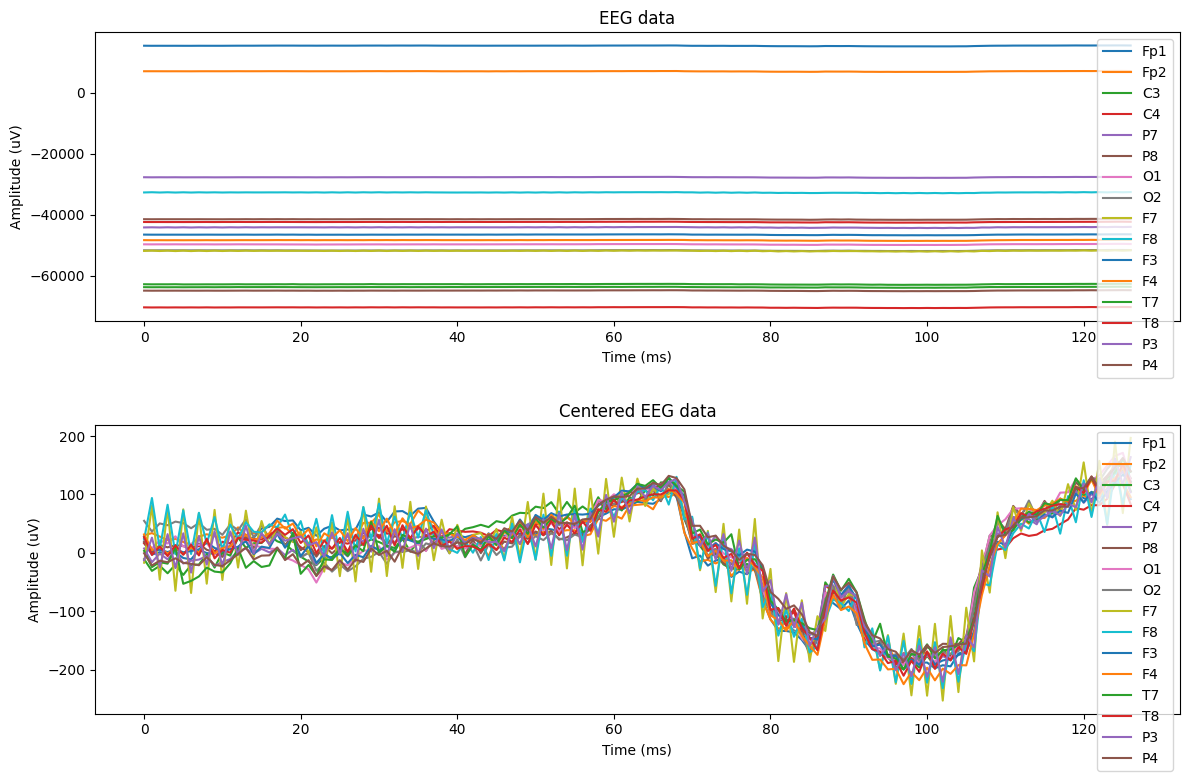

In [16]:
#cat = pd.read_csv('processed_data/eeg_data_cat_2.csv')
cat = pd.DataFrame(get_image_data(data, 'cat', 3, 3)['EEG_signal'], columns=EEG_COLUMNS)
plot_in_grid([plot_eeg_data_same_plot(cat),
            plot_eeg_data_same_plot(cat, centered=True)], 
            (2, 1))

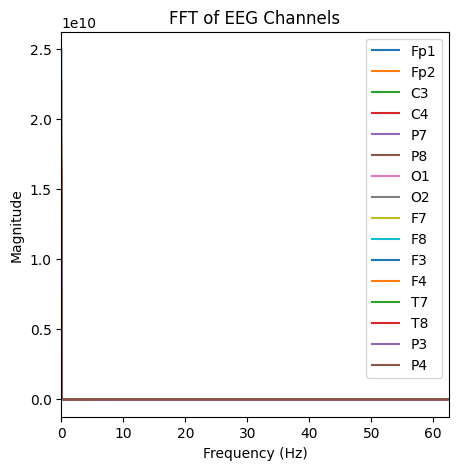

In [17]:
def plot_eeg_fft(eeg_data, plot=False):
    def plot_func(ax):
        sampling_rate = 125
        N = len(eeg_data)  # Number of data points

        for column in eeg_data.columns:
            # Compute FFT
            fft_values = np.fft.fft(eeg_data[column])
            frequencies = np.fft.fftfreq(N, 1/sampling_rate)

            # Plot the magnitude of the FFT
            ax.plot(frequencies, np.abs(fft_values), label=column)

        ax.set_title('FFT of EEG Channels')
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Magnitude')
        ax.set_xlim(0, sampling_rate / 2)  # Limit x-axis to positive frequencies
        ax.legend()

    if plot:
        fig, ax = plt.subplots(figsize=(5, 5))
        plot_func(ax)
        plt.show()
    else:
        return plot_func

plot_eeg_fft(eeg_df, plot=True)

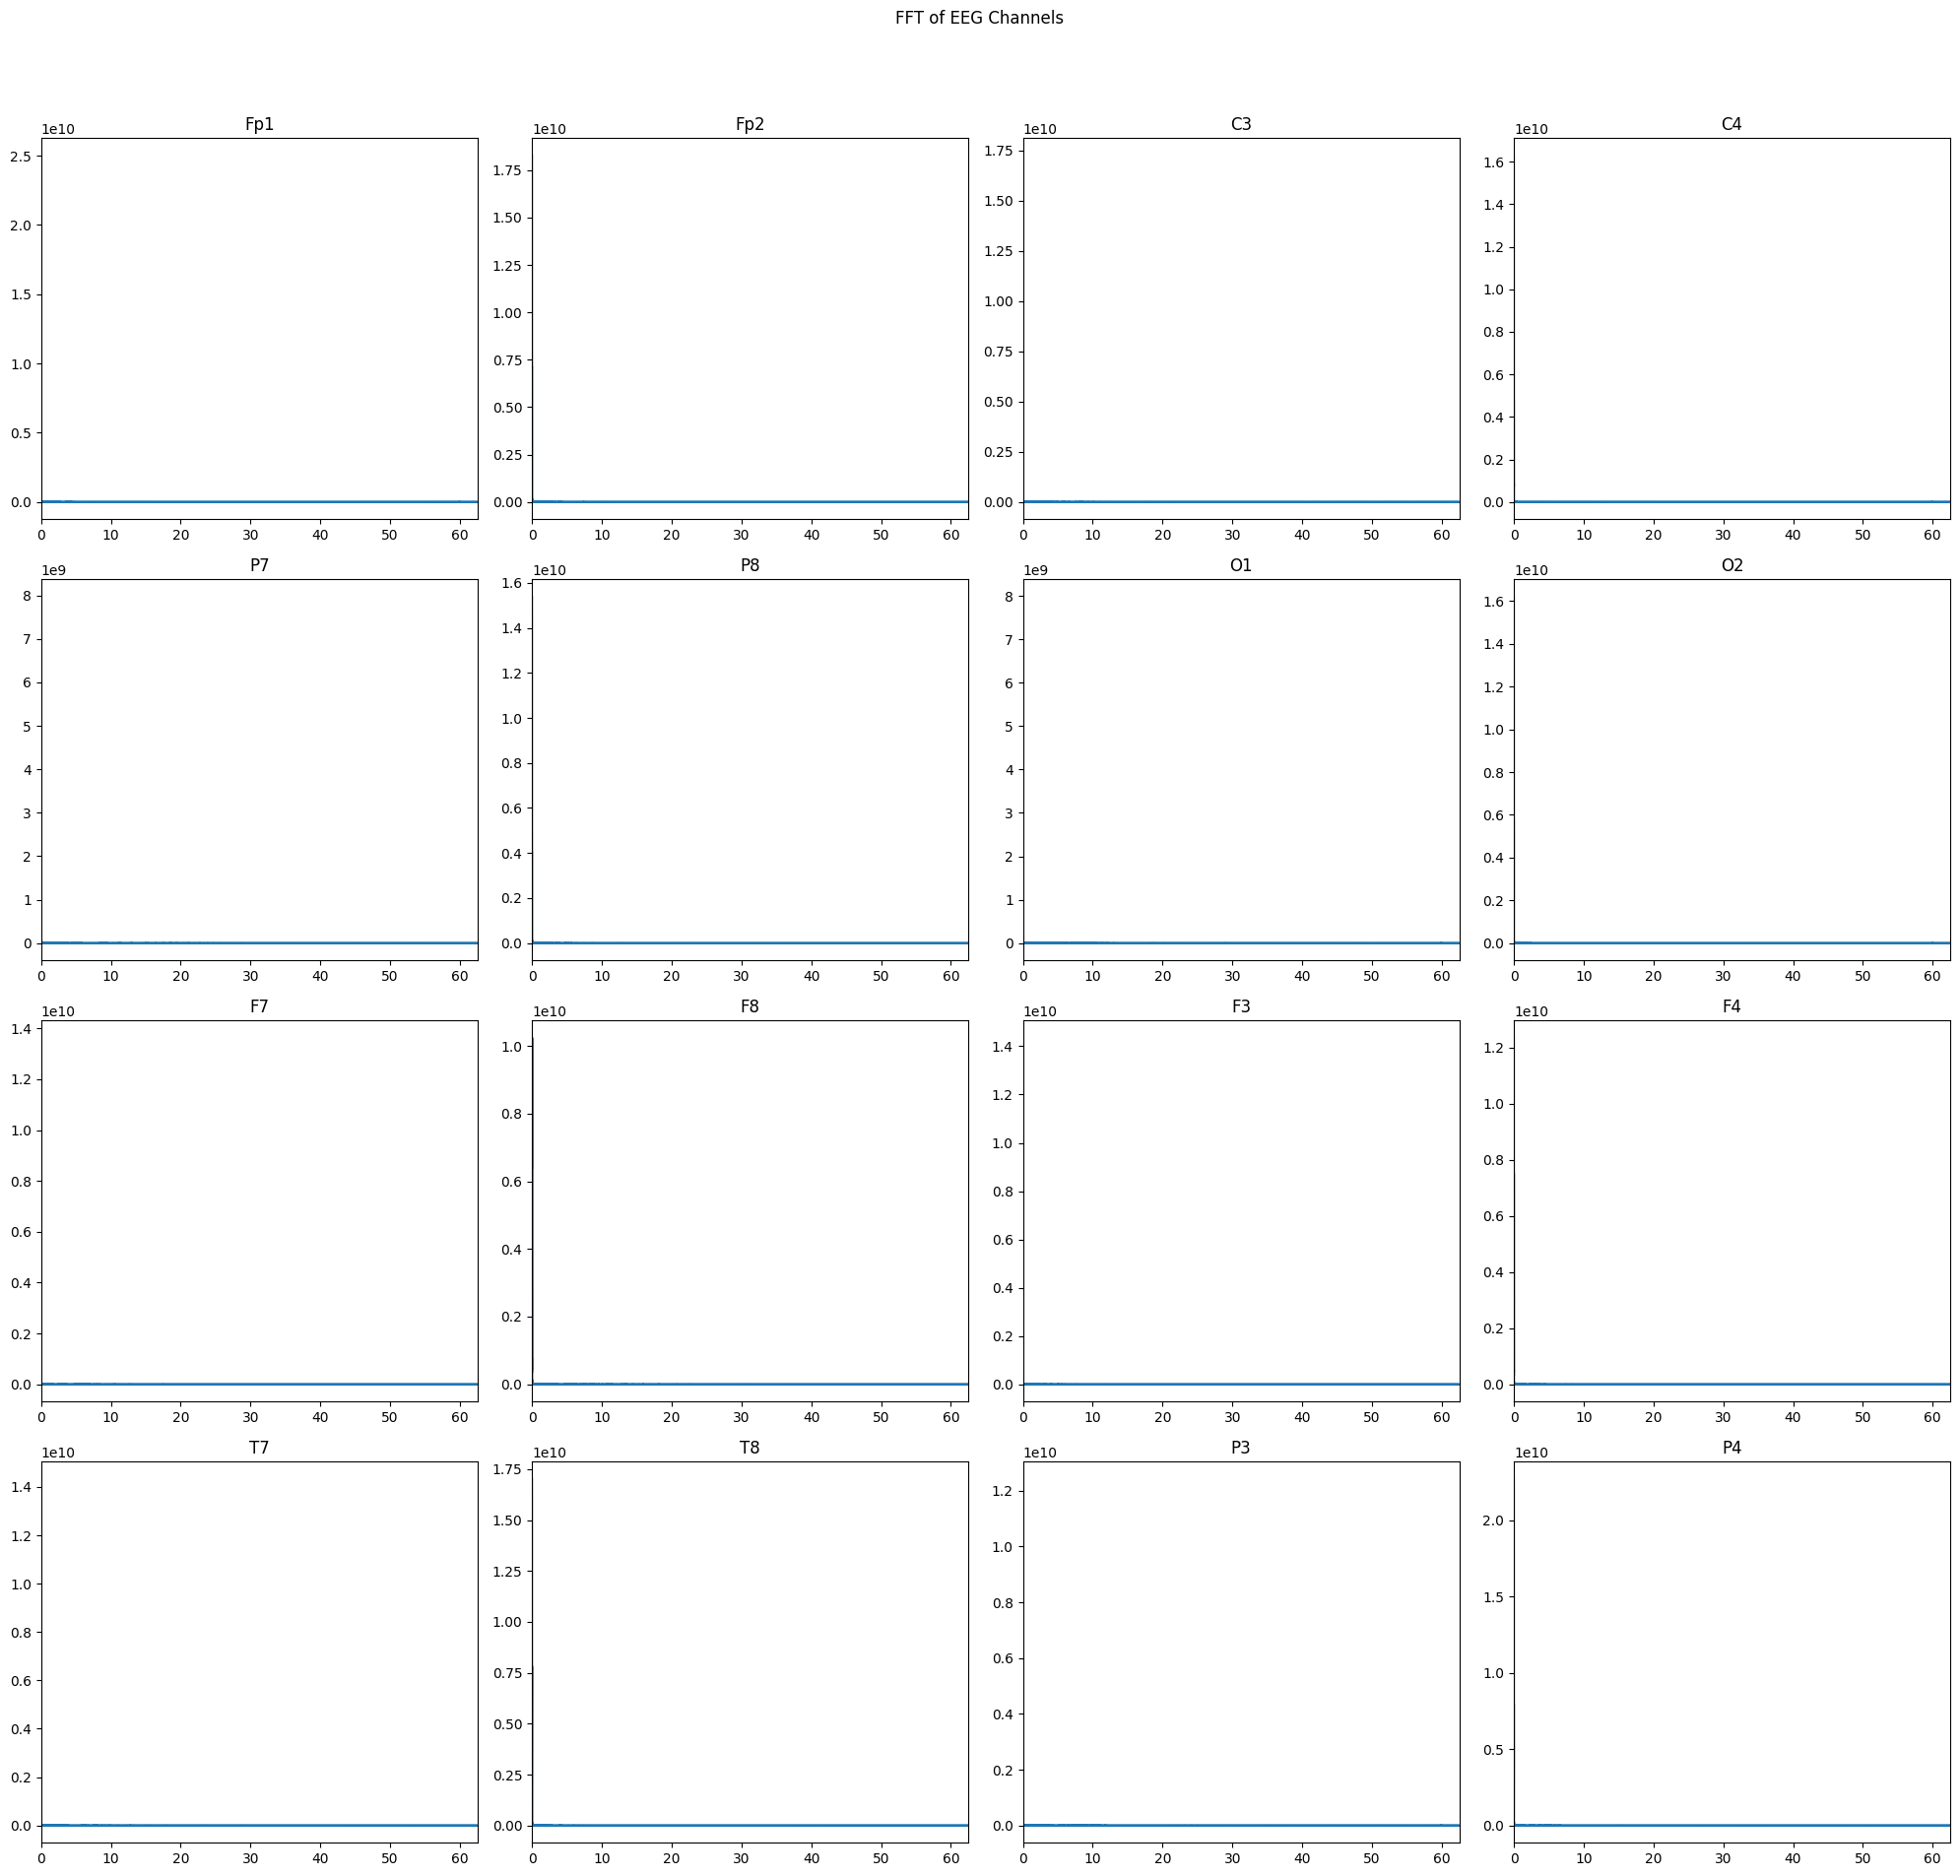

In [18]:
def plot_eeg_fft_grid(eeg_data):
    '''
    Plots the Fast Fourier Transform of each channel of the EEG data in a 3x4 grid.
    Params: 
        eeg_data: pandas DataFrame with the EEG data
    '''
    eeg_columns = eeg_data.columns
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns grid of plots
    fig.suptitle('FFT of EEG Channels')

    sampling_rate = 125  
    N = len(eeg_data)  # Number of data points

    for i, column in enumerate(eeg_columns):
        # Compute FFT
        fft_values = np.fft.fft(eeg_data[column])
        frequencies = np.fft.fftfreq(N, 1/sampling_rate)

        # Determine the row and column to place the subplot
        row = i // 4
        col = i % 4

        # Plot the magnitude of the FFT in the appropriate subplot
        axs[row, col].plot(frequencies, np.abs(fft_values))
        axs[row, col].set_title(column)
        axs[row, col].set_xlim(0, sampling_rate / 2)  # Limit x-axis to positive frequencies

    # Adjust layout to prevent overlap of subplot titles and axes labels
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_eeg_fft_grid(eeg_df)


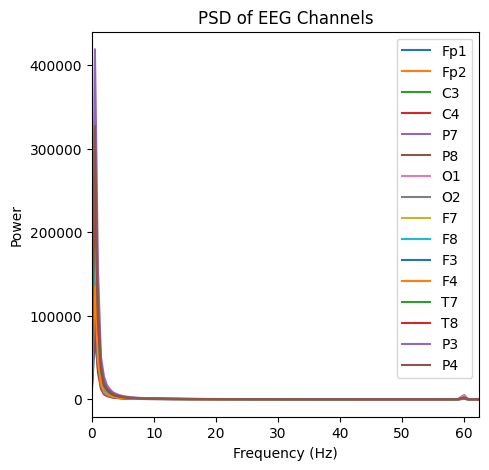

In [19]:
def plot_eeg_psd(eeg_data, plot=False):
    def plot_func(ax):
        sampling_rate = 125
        N = len(eeg_data)  # Number of data points

        for column in eeg_data.columns:
            # Compute PSD
            frequencies, psd_values = welch(eeg_data[column], fs=sampling_rate)

            # Plot the magnitude of the PSD
            ax.plot(frequencies, psd_values, label=column)

        ax.set_title('PSD of EEG Channels')
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Power')
        ax.set_xlim(0, sampling_rate / 2)  # Limit x-axis to positive frequencies
        ax.legend()

    if plot:
        fig, ax = plt.subplots(figsize=(5, 5))
        plot_func(ax)
        plt.show()
    else:
        return plot_func

plot_eeg_psd(eeg_df, plot=True)
#power spectral density

In [20]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 125  # Example sample rate
lowcut = 1.0
highcut = 60.0

# Function to design a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass_filter_df(data, around_cero=False, lowcut=1.0, highcut=60.0, fs=125, order=5):
    '''
    Applies a bandpass filter to each column of the input DataFrame and adds the original unfiltered mean
    Params:
        data: pandas DataFrame with the data to filter
        around_cero: boolean indicating whether to add the original unfiltered mean (default: False)
        lowcut: low cutoff frequency of the bandpass filter
        highcut: high cutoff frequency of the bandpass filter
        fs: sampling rate of the data
        order: order of the Butterworth filter
    '''
    filtered_data = pd.DataFrame()
    if around_cero:
        for column in data.columns:
            filtered_data[column] = butter_bandpass_filter(data[column], lowcut, highcut, fs, order=order)
    else:
        for column in data.columns:
            filtered_data[column] = butter_bandpass_filter(data[column], lowcut, highcut, fs, order=order)\
                                    + np.mean(data[column])
    return filtered_data

# Apply the bandpass filter to the EEG data
filtered_eeg_df = butter_bandpass_filter_df(eeg_df)
filtered_eeg_df_centered = butter_bandpass_filter_df(eeg_df, around_cero=True)

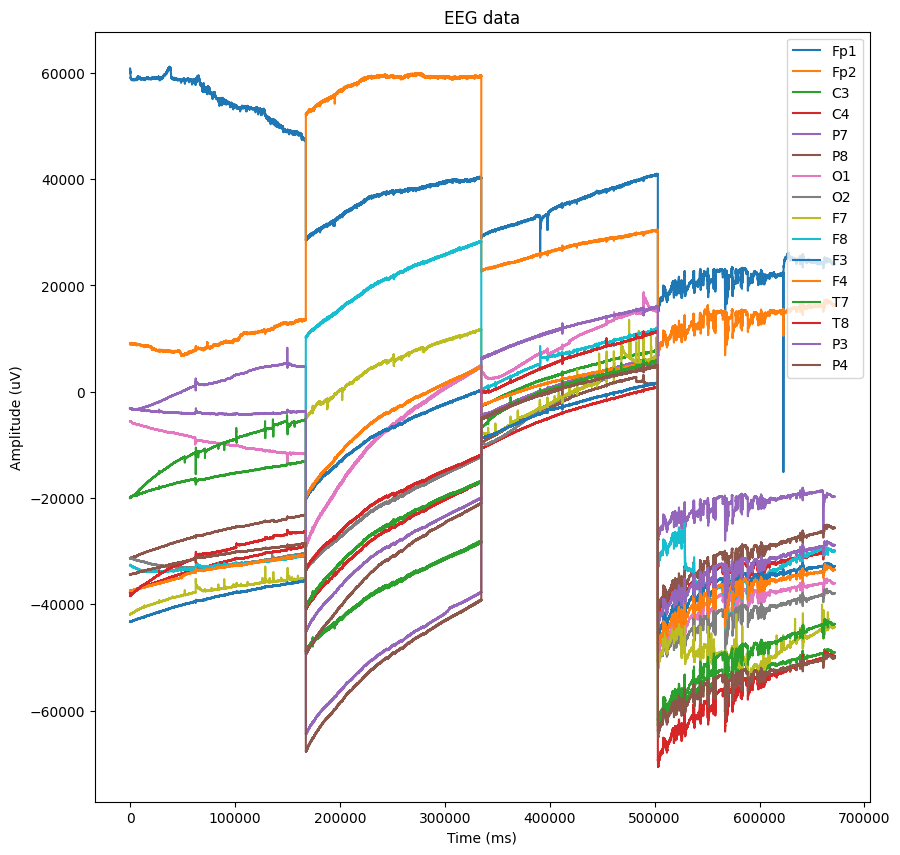

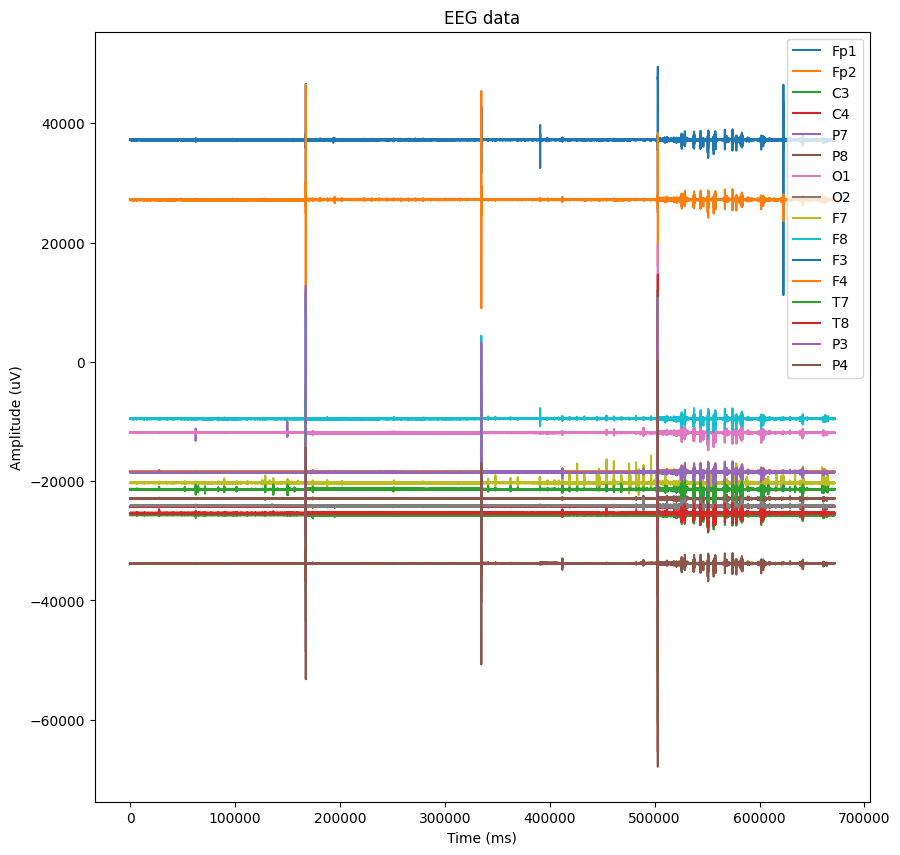

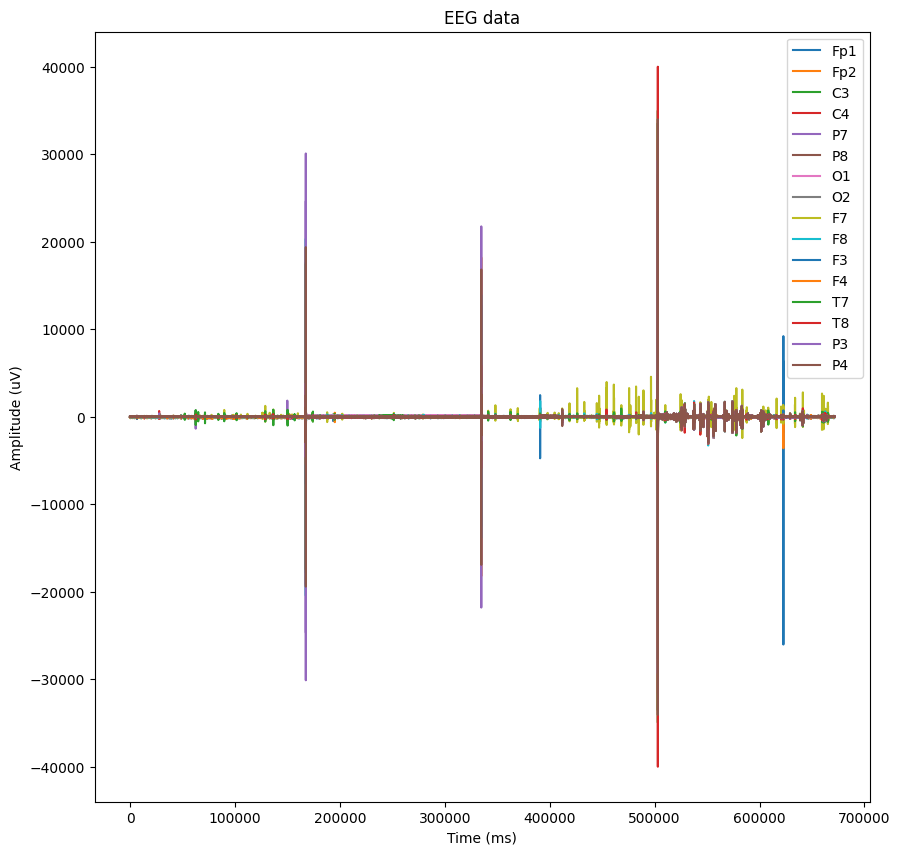

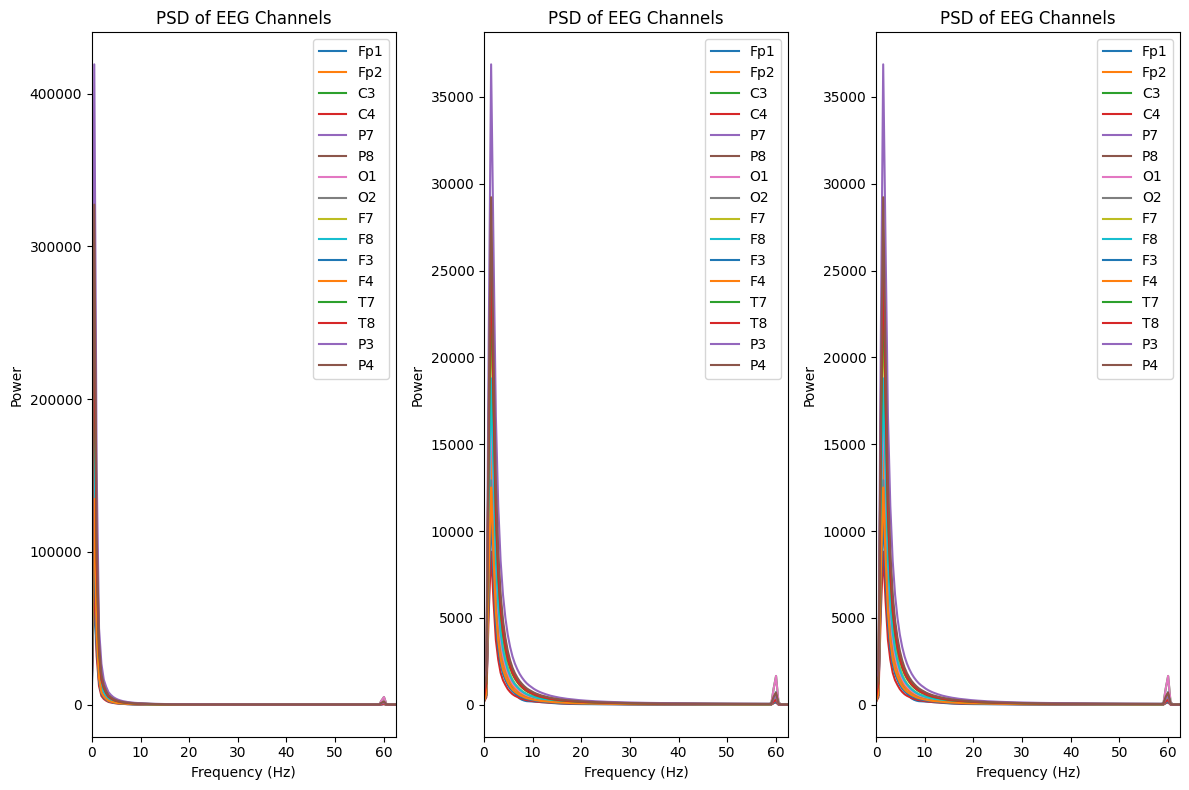

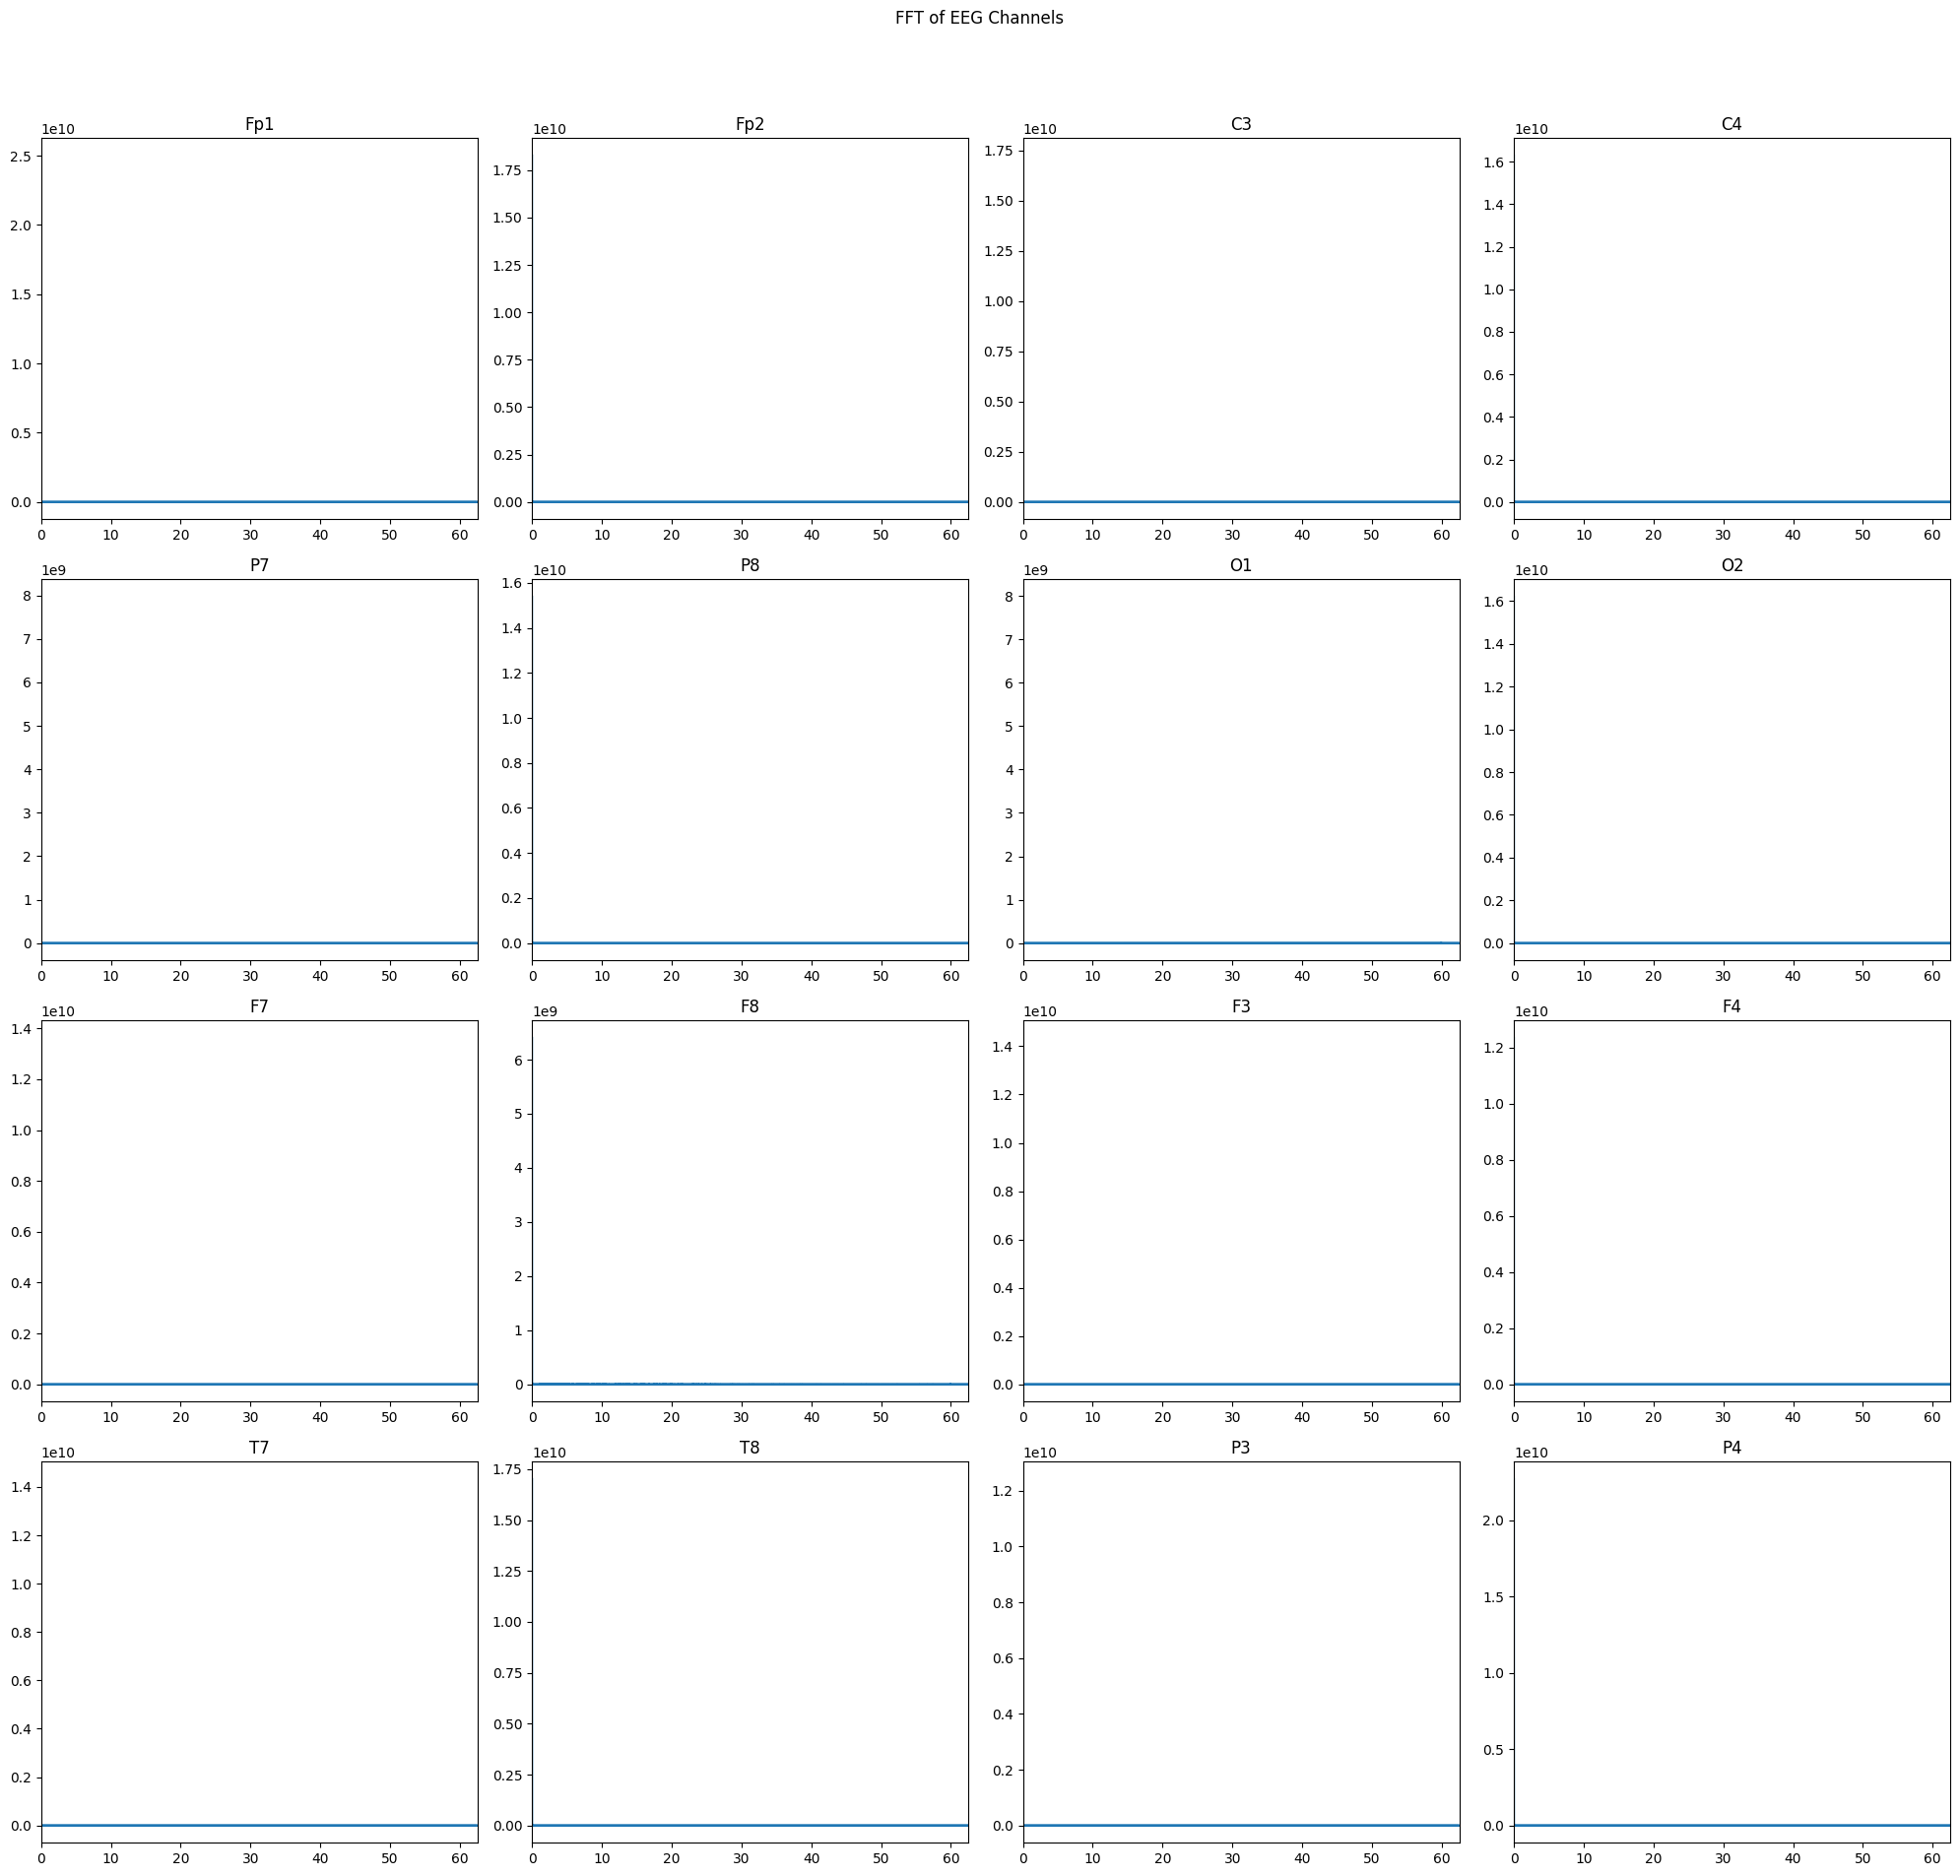

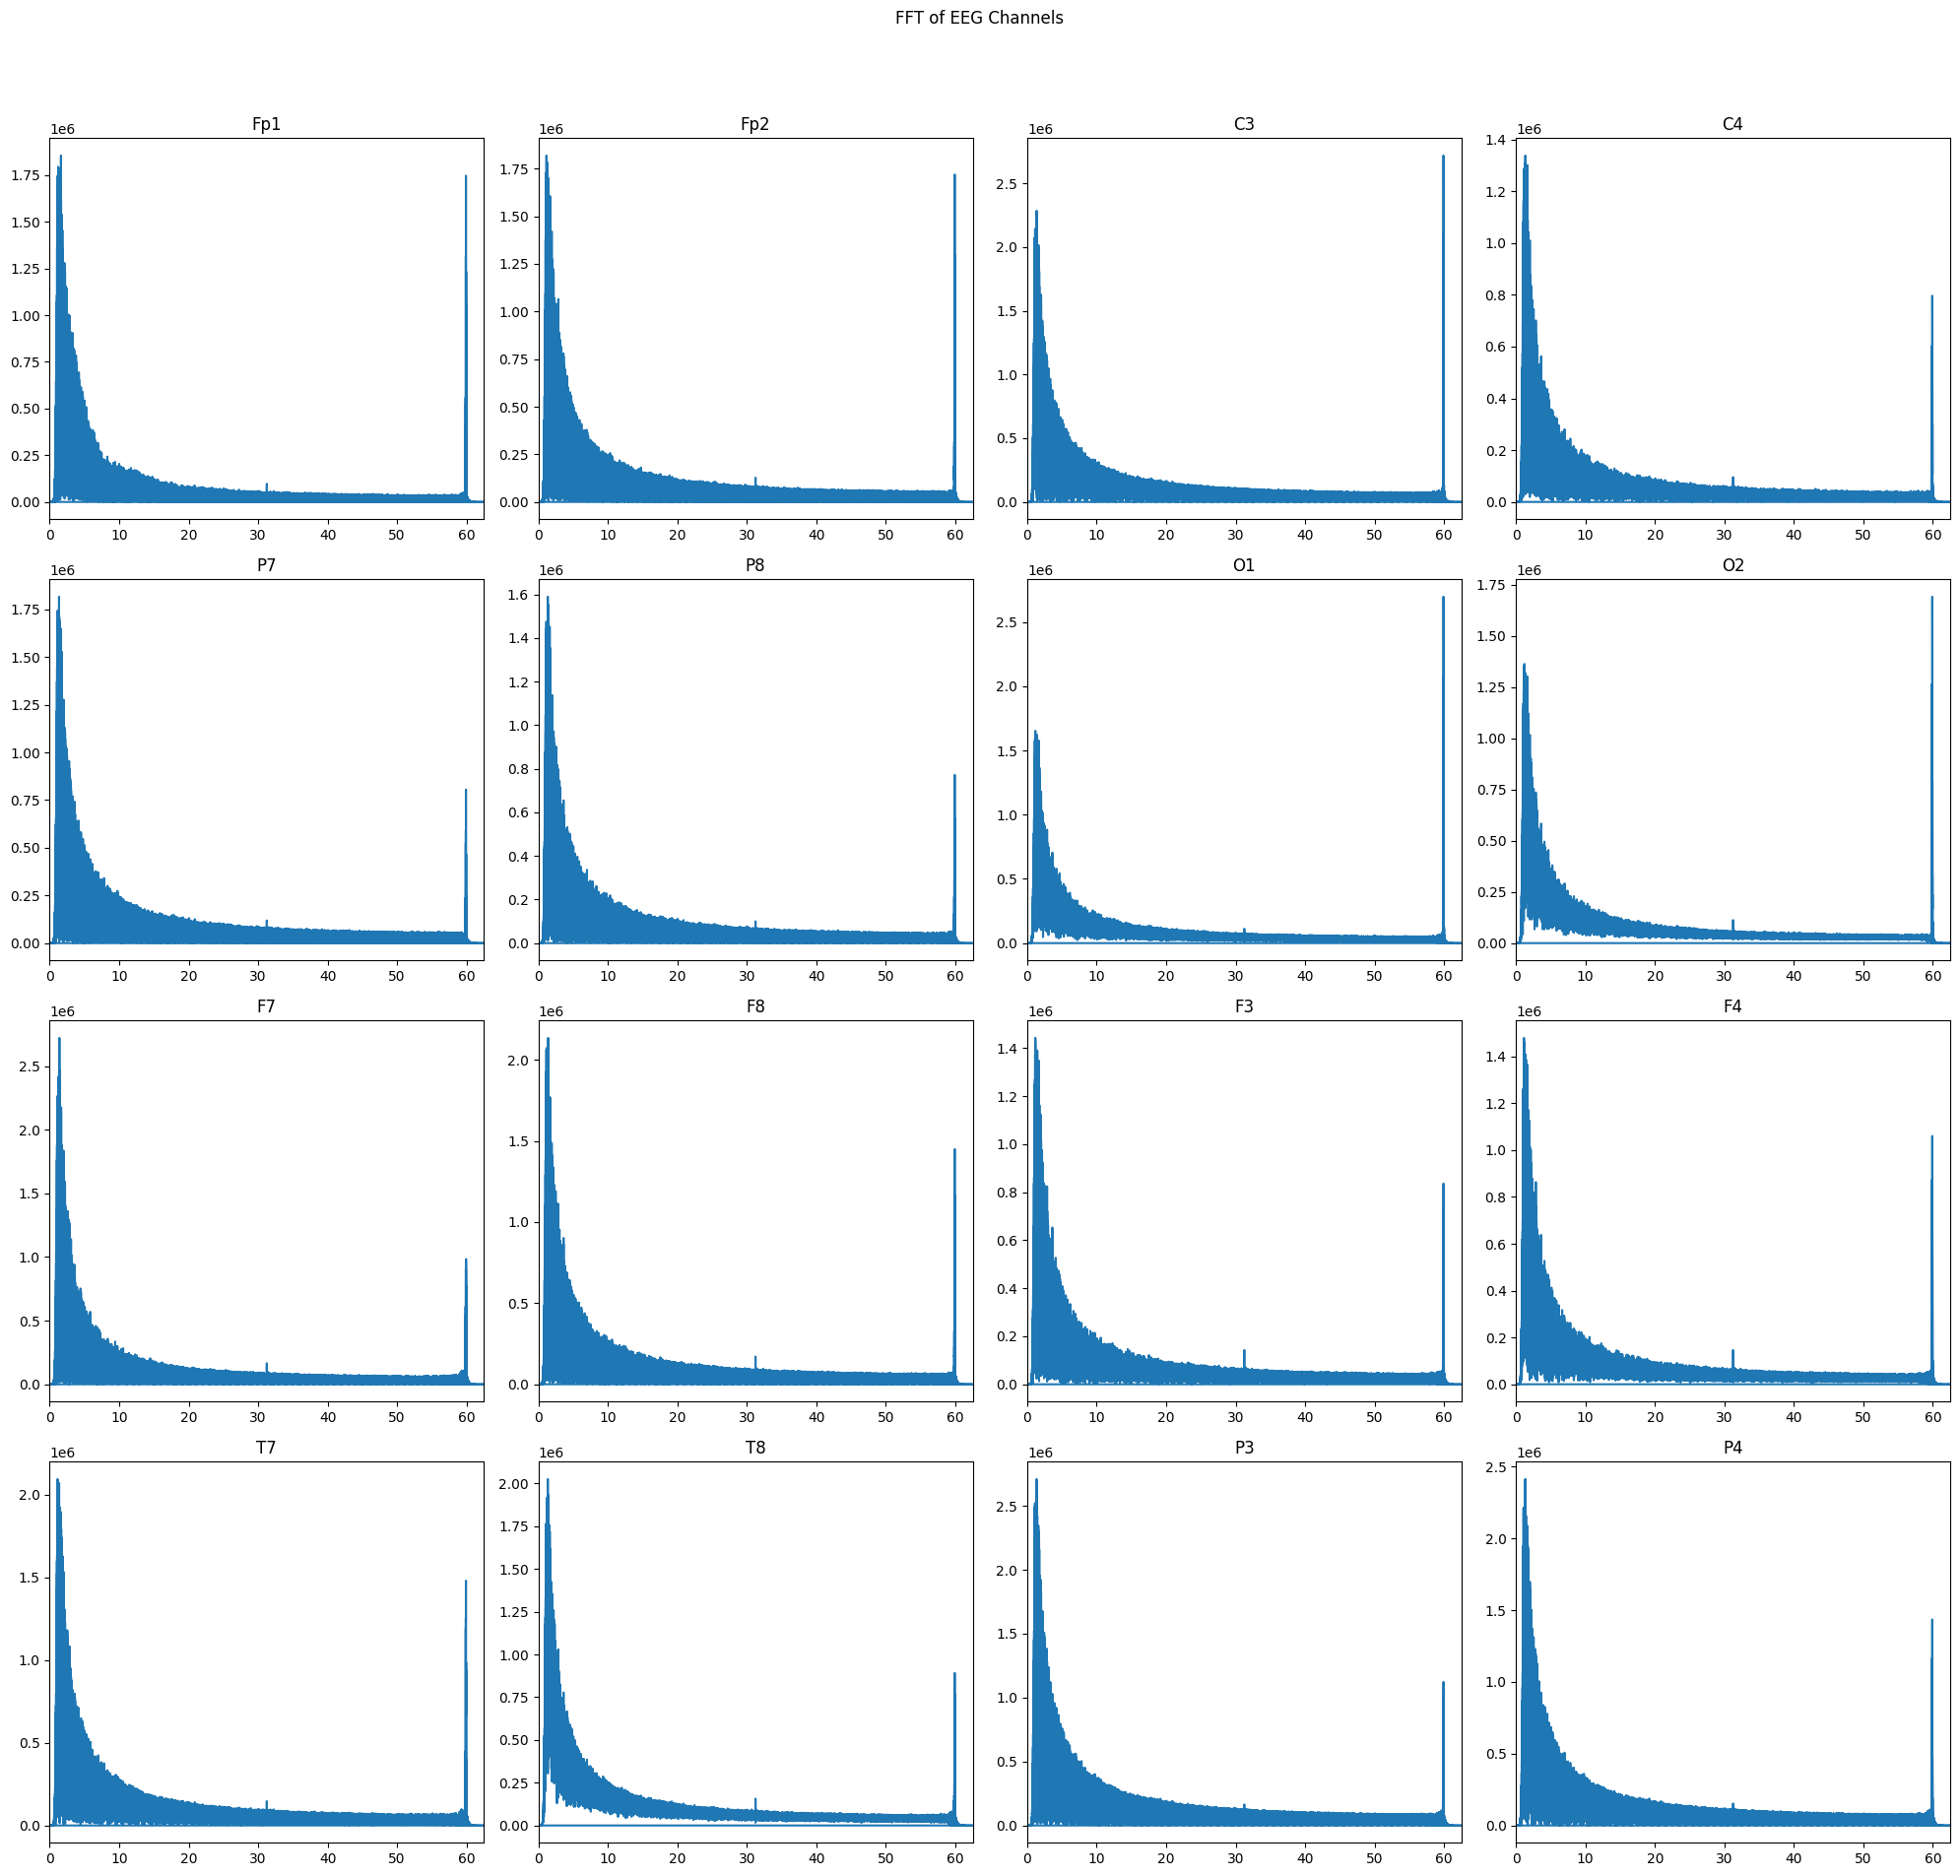

In [21]:
# Plot the filtered data
plot_eeg_data_same_plot(eeg_df, plot=True)
plot_eeg_data_same_plot(filtered_eeg_df, plot=True)
plot_eeg_data_same_plot(filtered_eeg_df_centered, plot=True)

# Plot the psd of the filtered data
plot_in_grid([plot_eeg_psd(eeg_df),
            plot_eeg_psd(filtered_eeg_df),
            plot_eeg_psd(filtered_eeg_df_centered)], 
            (1, 3))

plot_eeg_fft_grid(filtered_eeg_df)
plot_eeg_fft_grid(filtered_eeg_df_centered)

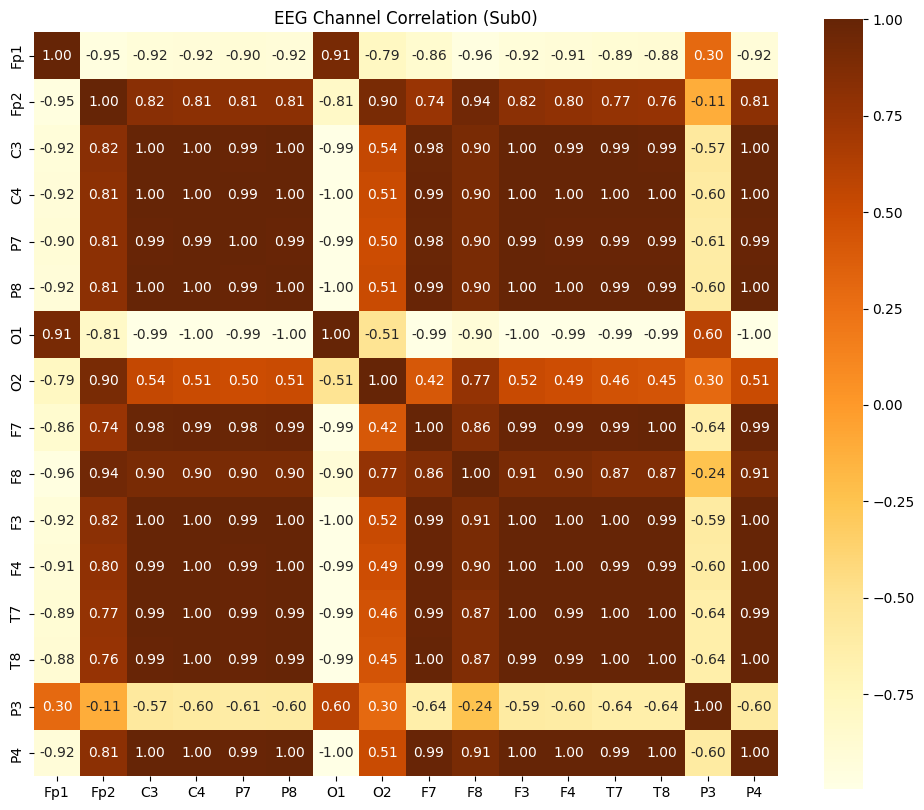

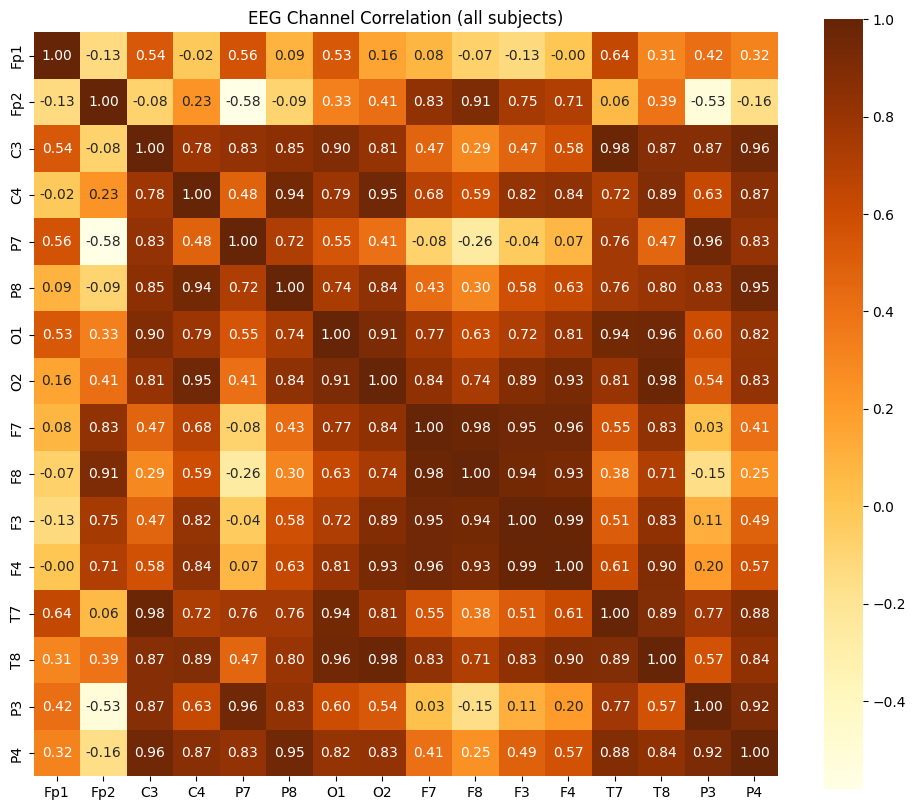

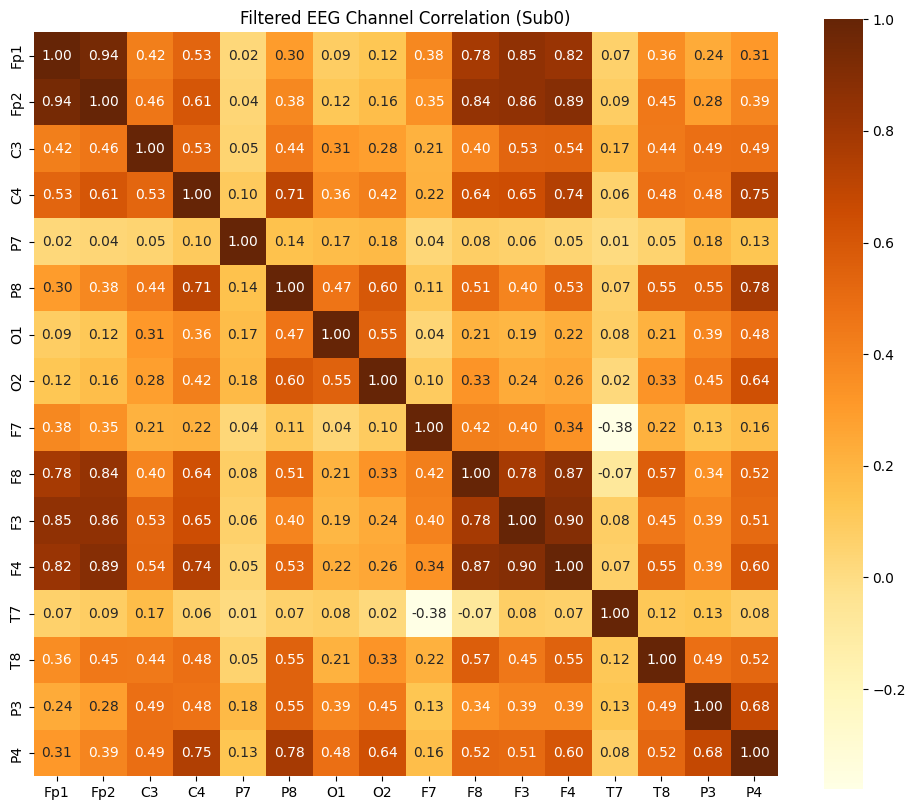

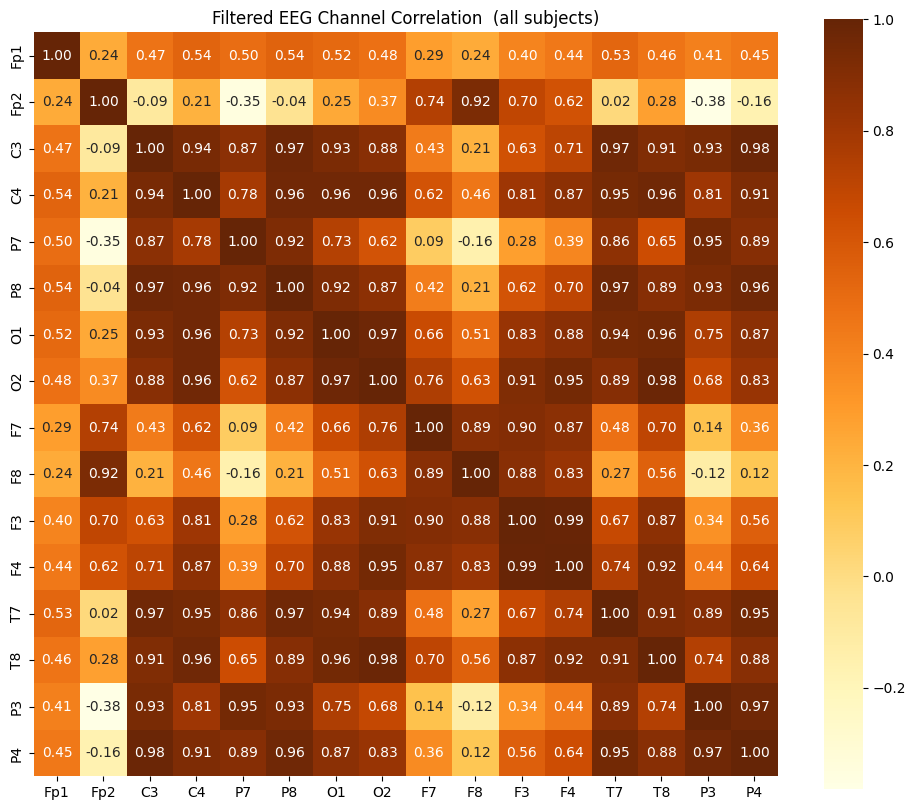

In [22]:
def plot_correlation_matrix(eeg_data, cmap='coolwarm', title='EEG Channel Correlation'):
    plt.figure(figsize=(12, 10))
    sns.heatmap(eeg_data.corr(), annot=True, fmt=".2f", square=True, cmap=cmap)
    plt.title(title)
    plt.show()

plot_correlation_matrix(eeg_df_sub0, cmap='YlOrBr', title='EEG Channel Correlation (Sub0)')
plot_correlation_matrix(eeg_df, cmap='YlOrBr', title='EEG Channel Correlation (all subjects)')
plot_correlation_matrix(butter_bandpass_filter_df(eeg_df_sub0), cmap='YlOrBr', title='Filtered EEG Channel Correlation (Sub0)')
plot_correlation_matrix(filtered_eeg_df, cmap='YlOrBr', title='Filtered EEG Channel Correlation  (all subjects)')


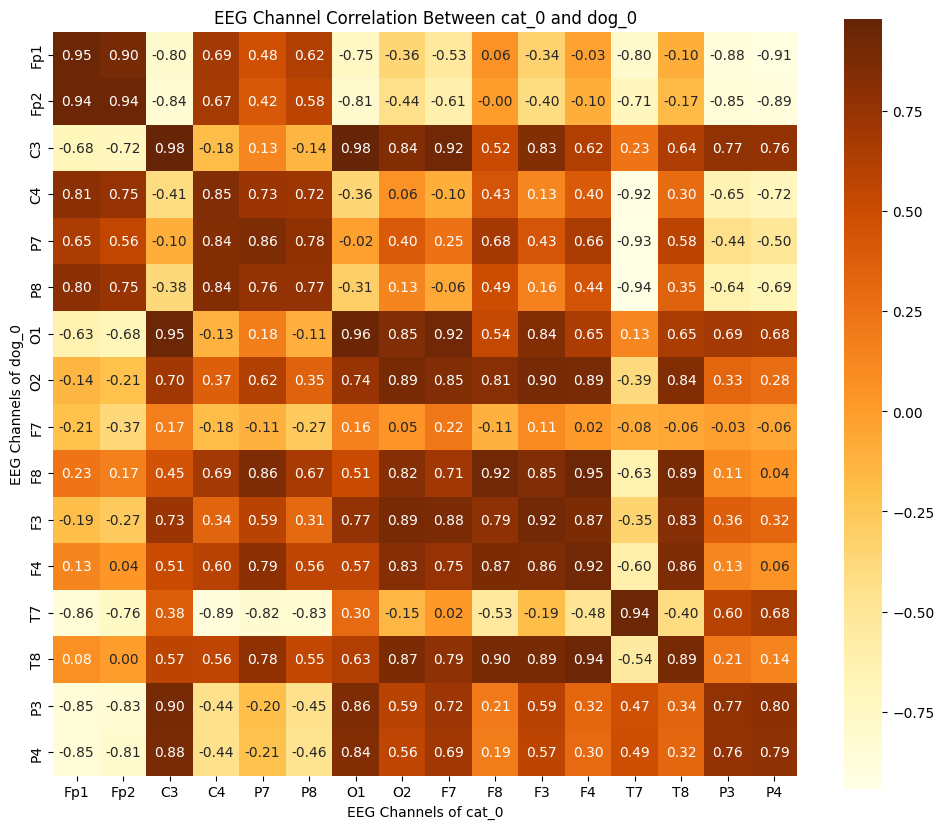

In [23]:
# correlation matrix between two different images
def plot_correlation_matrix_two_images(eeg_data1, eeg_data2, name1='Image 1', name2='Image 2', cmap='coolwarm', plot=False):
    '''
    Plots the correlation matrix between two sets of EEG data.
    Params:
        eeg_data1: pandas DataFrame with the first set of EEG data
        eeg_data2: pandas DataFrame with the second set of EEG data
        name1: string representing the name of the first DataFrame
        name2: string representing the name of the second DataFrame
        cmap: colormap for the heatmap (default: 'coolwarm')
    '''
    def plot_func(ax=None):
        # Ensure the columns are in the same order for both dataframes
        eeg_data1_aligned = eeg_data1[eeg_data2.columns]

        # Create a new DataFrame for correlations
        corr_matrix = pd.DataFrame()

        # Calculate correlation for each column
        for column in eeg_data1_aligned.columns:
            corr_matrix[column] = eeg_data1_aligned.corrwith(eeg_data2[column])

        if ax is None:
            ax = plt.gca()

        sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap=cmap, ax=ax)
        ax.set_title(f"EEG Channel Correlation Between {name1} and {name2}")
        ax.set_xlabel(f"EEG Channels of {name1}")  # X-axis label
        ax.set_ylabel(f"EEG Channels of {name2}")  # Y-axis label

    if plot:
        plt.figure(figsize=(12, 10))
        plot_func()
        plt.show()
    else:
        return plot_func


# Example usage
cat_image_str = 'cat_0'
dog_image_str = 'dog_0'

cat = pd.read_csv(f'processed_data/eeg_data_{cat_image_str}.csv')
dog = pd.read_csv(f'processed_data/eeg_data_{dog_image_str}.csv')
plot_correlation_matrix_two_images(cat, dog, name1=cat_image_str, name2=dog_image_str, cmap='YlOrBr', plot=True)
                                

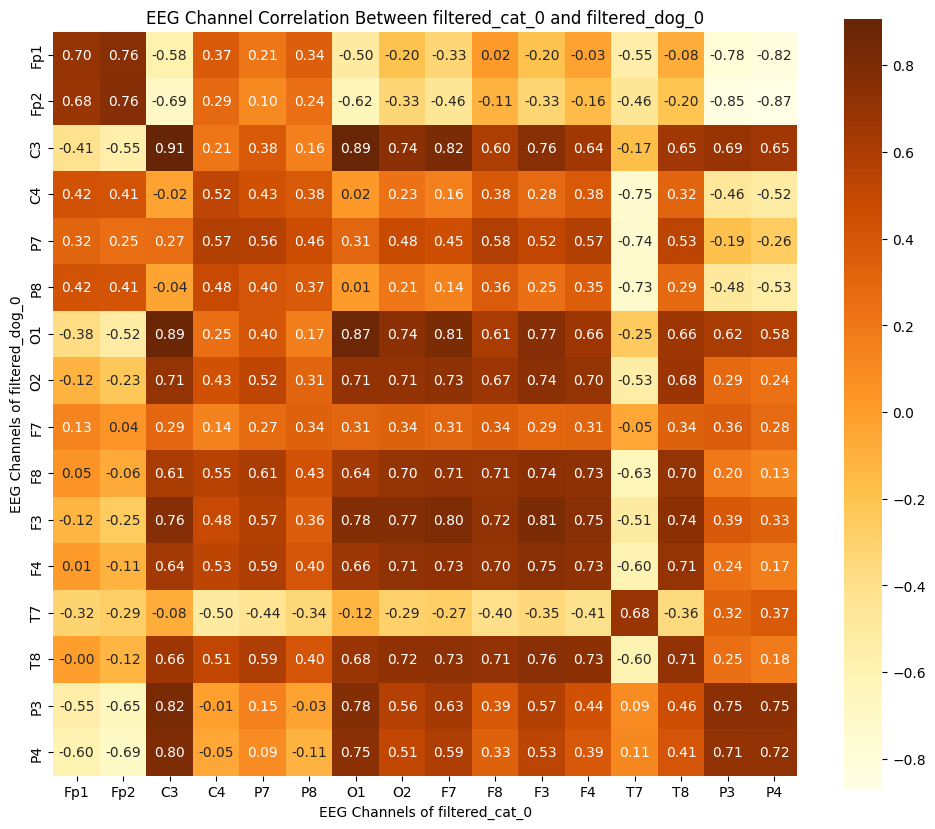

In [24]:
# correlation matrix between two different images filtered
filtered_cat = butter_bandpass_filter_df(cat)
filtered_dog = butter_bandpass_filter_df(dog)
plot_correlation_matrix_two_images(filtered_cat, filtered_dog, name1=f'filtered_{cat_image_str}', name2=f'filtered_{dog_image_str}', cmap='YlOrBr', plot=True)

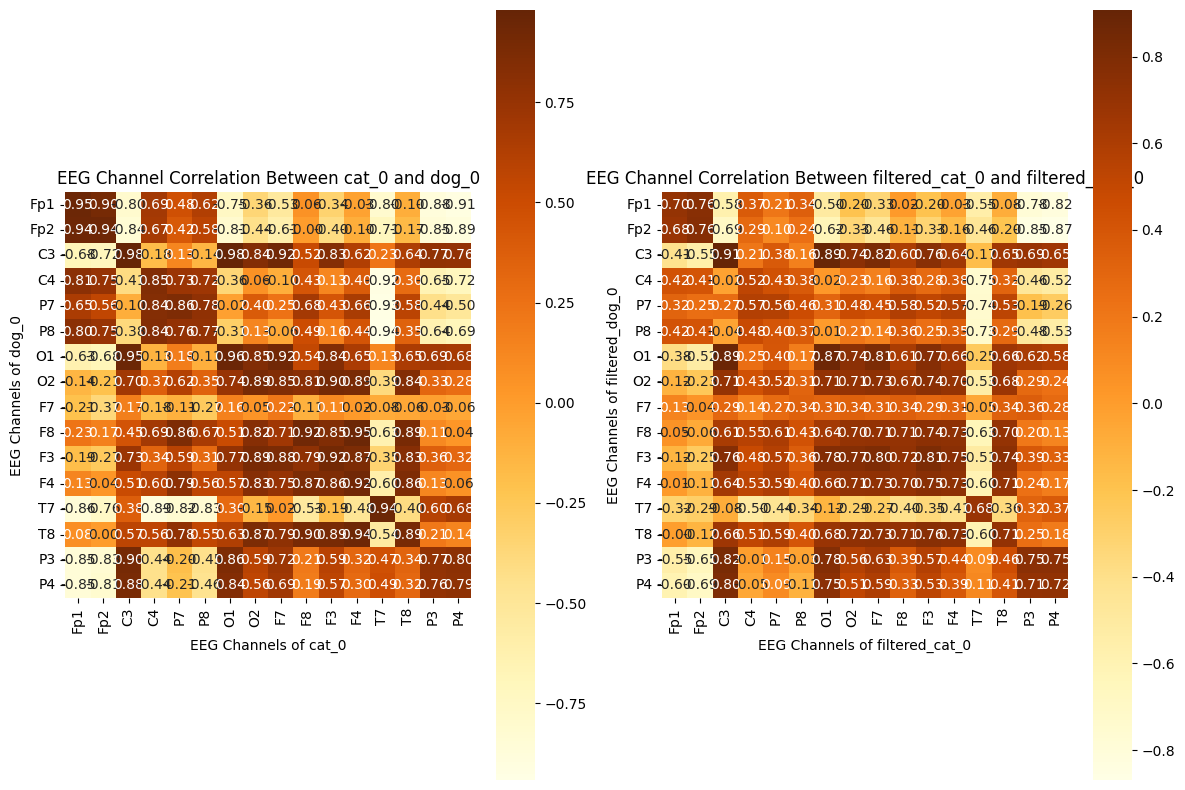

In [25]:
# grid of correlation matrices between all images
plot_in_grid([plot_correlation_matrix_two_images(cat, dog, name1=cat_image_str, name2=dog_image_str, cmap='YlOrBr'),
             plot_correlation_matrix_two_images(filtered_cat, filtered_dog, name1=f'filtered_{cat_image_str}', name2=f'filtered_{dog_image_str}', cmap='YlOrBr')
             ], (1, 2))

In [26]:
# check if the shape of all the images is the same
import os
from pprint import pprint

files = os.listdir('processed_data')
len_value_counts = {}
for file in files:
    if 'eeg_data' in file:
        df = pd.read_csv(f'processed_data/{file}')
        if df.shape[0] not in len_value_counts:
            len_value_counts[df.shape[0]] = [1, [file]]
        else:
            len_value_counts[df.shape[0]][0] += 1
            len_value_counts[df.shape[0]][1].append(file)
             
pprint(len_value_counts)
            #print(f'{file}: {df.shape}')

{0: [1, ['eeg_data_no_stimuli_23.csv']],
 35: [1, ['eeg_data_rabbit_251.csv']],
 47: [1, ['eeg_data_cat_202.csv']],
 72: [1, ['eeg_data_dog_250.csv']],
 82: [1, ['eeg_data_dog_191.csv']],
 91: [1, ['eeg_data_cat_2.csv']],
 100: [1, ['eeg_data_control_150.csv']],
 111: [2, ['eeg_data_control_248.csv', 'eeg_data_dog_18.csv']],
 112: [1, ['eeg_data_dog_103.csv']],
 113: [1, ['eeg_data_cat_52.csv']],
 114: [1, ['eeg_data_cat_3.csv']],
 115: [1, ['eeg_data_dog_50.csv']],
 119: [1, ['eeg_data_control_82.csv']],
 120: [3,
       ['eeg_data_control_0.csv',
        'eeg_data_control_250.csv',
        'eeg_data_dog_185.csv']],
 121: [4,
       ['eeg_data_control_209.csv',
        'eeg_data_control_299.csv',
        'eeg_data_rabbit_209.csv',
        'eeg_data_rabbit_299.csv']],
 122: [20,
       ['eeg_data_cat_148.csv',
        'eeg_data_cat_15.csv',
        'eeg_data_cat_18.csv',
        'eeg_data_control_120.csv',
        'eeg_data_control_199.csv',
        'eeg_data_control_201.csv',
        

In [27]:
# print len_value_counts ordered
pprint(sorted(len_value_counts.items(), key=lambda x: x[1], reverse=True))

[(125,
  [549,
   ['eeg_data_cat_101.csv',
    'eeg_data_cat_102.csv',
    'eeg_data_cat_103.csv',
    'eeg_data_cat_108.csv',
    'eeg_data_cat_110.csv',
    'eeg_data_cat_111.csv',
    'eeg_data_cat_113.csv',
    'eeg_data_cat_114.csv',
    'eeg_data_cat_116.csv',
    'eeg_data_cat_118.csv',
    'eeg_data_cat_121.csv',
    'eeg_data_cat_127.csv',
    'eeg_data_cat_13.csv',
    'eeg_data_cat_131.csv',
    'eeg_data_cat_134.csv',
    'eeg_data_cat_136.csv',
    'eeg_data_cat_137.csv',
    'eeg_data_cat_139.csv',
    'eeg_data_cat_14.csv',
    'eeg_data_cat_142.csv',
    'eeg_data_cat_143.csv',
    'eeg_data_cat_144.csv',
    'eeg_data_cat_145.csv',
    'eeg_data_cat_150.csv',
    'eeg_data_cat_151.csv',
    'eeg_data_cat_153.csv',
    'eeg_data_cat_154.csv',
    'eeg_data_cat_155.csv',
    'eeg_data_cat_156.csv',
    'eeg_data_cat_159.csv',
    'eeg_data_cat_163.csv',
    'eeg_data_cat_165.csv',
    'eeg_data_cat_166.csv',
    'eeg_data_cat_167.csv',
    'eeg_data_cat_168.csv',
    'ee